In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [8]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

In [9]:
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f"Scriping Page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    reposnse = requests.get(url)
    
    content = reposnse.content
    parsed_content = BeautifulSoup(content, "html.parser")
    
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    print(f"      -----> {len(reviews)} total reviews")


Scriping Page 1
      -----> 100 total reviews
Scriping Page 2
      -----> 200 total reviews
Scriping Page 3
      -----> 300 total reviews
Scriping Page 4
      -----> 400 total reviews
Scriping Page 5
      -----> 500 total reviews
Scriping Page 6
      -----> 600 total reviews
Scriping Page 7
      -----> 700 total reviews
Scriping Page 8
      -----> 800 total reviews
Scriping Page 9
      -----> 900 total reviews
Scriping Page 10
      -----> 1000 total reviews


In [10]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | We flew BA between Heathrow an...
1,Not Verified | Absolutely disgusted with BA. ...
2,Not Verified | Took a trip to Nashville with m...
3,Not Verified | A nightmare journey courtesy o...
4,✅ Trip Verified | Absolutely atrocious. LHR-OR...


In [11]:
df.to_csv("BA_reviews.csv", index=False)

In [12]:
df = pd.read_csv("BA_reviews.csv")

In [13]:
df.head()

,Unnamed: 0,reviews
0,0,Not Verified | We flew BA between Heathrow an...
1,1,Not Verified | Absolutely disgusted with BA. ...
2,2,Not Verified | Took a trip to Nashville with m...
3,3,Not Verified | A nightmare journey courtesy o...
4,4,✅ Trip Verified | Absolutely atrocious. LHR-OR...


In [14]:
df["reviews"] = df["reviews"].str.replace("✅ Trip Verified |", "", regex=False)

In [15]:
df.head()

,Unnamed: 0,reviews
0,0,Not Verified | We flew BA between Heathrow an...
1,1,Not Verified | Absolutely disgusted with BA. ...
2,2,Not Verified | Took a trip to Nashville with m...
3,3,Not Verified | A nightmare journey courtesy o...
4,4,Absolutely atrocious. LHR-ORD-LHR Round-trip....


In [16]:
df.drop(df.columns[df.columns.str.contains('^Unnamed', regex=True)], axis=1, inplace=True)

df.head()

,reviews
0,Not Verified | We flew BA between Heathrow an...
1,Not Verified | Absolutely disgusted with BA. ...
2,Not Verified | Took a trip to Nashville with m...
3,Not Verified | A nightmare journey courtesy o...
4,Absolutely atrocious. LHR-ORD-LHR Round-trip....


In [17]:
df["reviews"] = df["reviews"].str.replace("Not Verified |", "", regex=False)

In [18]:
df.head(1000)

,reviews
0,We flew BA between Heathrow and Berlin one w...
1,Absolutely disgusted with BA. Our flights we...
2,Took a trip to Nashville with my wife for a l...
3,A nightmare journey courtesy of British Airw...
4,Absolutely atrocious. LHR-ORD-LHR Round-trip....
...,...
995,❎ London to Olbia. Complete confusion. The pl...
996,Rotterdam to London City. After waiting for ...
997,Return flight to Dublin. Outbound Galleries ...
998,Barbados to Gatwick. We boarded a half full ...


In [19]:
df["reviews"] = df["reviews"].str.replace("❎", "", regex=False)

In [20]:
df.head(1000)

,reviews
0,We flew BA between Heathrow and Berlin one w...
1,Absolutely disgusted with BA. Our flights we...
2,Took a trip to Nashville with my wife for a l...
3,A nightmare journey courtesy of British Airw...
4,Absolutely atrocious. LHR-ORD-LHR Round-trip....
...,...
995,London to Olbia. Complete confusion. The pla...
996,Rotterdam to London City. After waiting for ...
997,Return flight to Dublin. Outbound Galleries ...
998,Barbados to Gatwick. We boarded a half full ...


In [21]:
df.describe()

,reviews
count,1000
unique,1000
top,We flew BA between Heathrow and Berlin one w...
freq,1


In [22]:
df.isnull().sum()

reviews    0
dtype: int64

In [23]:
df.nunique()

reviews    1000
dtype: int64

In [24]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [26]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
analyzer = SentimentIntensityAnalyzer()

In [28]:
def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return analyzer.polarity_scores(text)['compound']

df['sentiment'] = df['reviews'].apply(vadar_sentiment)

def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label
df['polarity'] = df['sentiment'].apply(categorise_sentiment)

In [29]:
df

,reviews,sentiment,polarity
0,We flew BA between Heathrow and Berlin one w...,0.9811,positive
1,Absolutely disgusted with BA. Our flights we...,-0.7047,negative
2,Took a trip to Nashville with my wife for a l...,0.7861,positive
3,A nightmare journey courtesy of British Airw...,-0.8520,negative
4,Absolutely atrocious. LHR-ORD-LHR Round-trip....,-0.9600,negative
...,...,...,...
995,London to Olbia. Complete confusion. The pla...,-0.9726,negative
996,Rotterdam to London City. After waiting for ...,-0.9539,negative
997,Return flight to Dublin. Outbound Galleries ...,0.8536,positive
998,Barbados to Gatwick. We boarded a half full ...,0.7998,positive


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   reviews    1000 non-null   object 
 1   sentiment  1000 non-null   float64
 2   polarity   1000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 23.6+ KB


In [31]:
df["polarity"].value_counts()

negative    520
positive    465
neutral      15
Name: polarity, dtype: int64

In [32]:
 value_count = df["polarity"].value_counts()

In [33]:
Percentage = ((value_count / 1000)*100).round(0)

In [34]:
Percentage

negative    52.0
positive    46.0
neutral      2.0
Name: polarity, dtype: float64

In [35]:
import matplotlib.pyplot as plt

import seaborn as sns

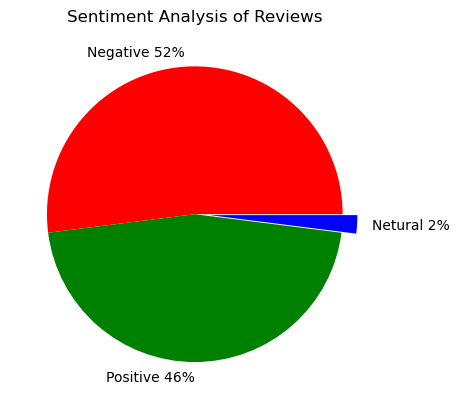

In [48]:
values = [52,46,2]
labels = 'Negative 52%', 'Positive 46%', 'Netural 2%'
colors = {'r', 'b', 'g'}
plt.title('Sentiment Analysis of Reviews')
explode = [0, 0, 0.1]
plt.pie(values, labels=labels, colors=colors, explode=explode)
plt.show()

In [49]:
df

,reviews,sentiment,polarity
0,We flew BA between Heathrow and Berlin one w...,0.9811,positive
1,Absolutely disgusted with BA. Our flights we...,-0.7047,negative
2,Took a trip to Nashville with my wife for a l...,0.7861,positive
3,A nightmare journey courtesy of British Airw...,-0.8520,negative
4,Absolutely atrocious. LHR-ORD-LHR Round-trip....,-0.9600,negative
...,...,...,...
995,London to Olbia. Complete confusion. The pla...,-0.9726,negative
996,Rotterdam to London City. After waiting for ...,-0.9539,negative
997,Return flight to Dublin. Outbound Galleries ...,0.8536,positive
998,Barbados to Gatwick. We boarded a half full ...,0.7998,positive


In [51]:
df.to_excel("BA_Sentiment_Analysis.xlsx", index=False)